## Proyecto sobre calidad del aire en sector sur-oriente de la RM.


#### 1. Contexto y motivaciones:
La calidad del aire es un tema súper importante hoy en día, especialmente en Santiago, donde hay un montón de cosas que la empeoran. Por ejemplo, todos los autos que andan por la calle, las fábricas, la contaminación que a veces generamos nosotros mismos y hasta cómo es la ciudad geográficamente, hacen que tengamos niveles de contaminación súper altos en el aire. Por eso, nos pusimos a pensar en este tema tan actual y se nos ocurrió buscar una solución usando unos aparatos que monitorean la contaminación y que están conectados al SINCA.
En particular, nos enfocamos en unos dispositivos que están en la Municipalidad de La Florida. Estos aparatos están analizando la contaminación del aire y sus diferentes componentes en varias zonas de Chile. Elegimos este dispositivo porque la zona que monitorea también incluye una parte de Macul, donde está la Pontificia Universidad Católica de Chile. Como pasamos la mayor parte del tiempo ahí, nos preocupa mucho la calidad del aire que respiramos. Pensamos en todas las enfermedades respiratorias que podríamos contraer, que nos podrían llevar al hospital o, en el peor de los casos, a algo mucho más grave. Los altos niveles de contaminación son factores directos en la aparición y agravamiento de enfermedades respiratorias, cardiovasculares y alérgicas. En ese contexto, buscamos contribuir a la concientización ciudadana y a la toma de decisiones informadas por parte de organismos públicos como el Ministerio del Medio Ambiente, las municipalidades y los servicios de salud, promoviendo la generación de conocimiento basado en datos abiertos. Además, nos dimos cuenta de que la gente de La Florida y de las comunas cercanas, como la nuestra, también está expuesta a estos riesgos, lo que hace que este problema sea aún más relevante para la comunidad en general. Queremos contribuir a que la gente tome conciencia de lo importante que es respirar aire limpio y cómo esto afecta directamente nuestra salud y bienestar a largo plazo. Es un tema que nos toca de cerca y sentimos que podemos aportar con este proyecto.
Además, esperamos que este trabajo ayude a comprender cómo se comportan distintos contaminantes atmosféricos en el tiempo y qué implicancias tienen para la salud pública, de modo que pueda servir como base para futuras políticas de mitigación o educación ambiental.

#### 2. Objetivo: 

El objetivo del proyecto es analizar la evolución y el impacto de distintos contaminantes atmosféricos con la información obtenida a través de los dispositivos del SINCA en el sector sur-oriente de Santiago, comparando sus niveles, tendencias y relaciones, para poder identificar patrones relevantes y estimar un posible riesgo de salud en los habitantes del sector, por lo que la pregunta a responder es ¿Cómo afectan estos contaminantes atmosféricos a la salud de los habitantes del sector? A través de este proyecto nos gustaría concientizar a la gente de los peligros que puede ocasionar de no disminuir la contaminación ambiental a su salud, por último, nuestra audiencia objetivo son la ciudadanía en general, autoridades ambientales, instituciones educativas y de salud, especialmente aquellas relacionadas con el monitoreo y gestión de la calidad del aire.

#### 3. Datos

##### 3.1 Origen y Recoleccion de datos

Los datos serán recopilados del dispositivo de SINCA (Sistema de Información Nacional de Calidad del Aire) ubicado en La Florida, datos públicos sobre los distintos contaminantes atmosféricos y sus cambios en el tiempo.
MMA Sector Sur-Oriente 

Pero también, estaremos analizando si incorporar datos semi-estructurados provenientes de informes de salud pública sobre enfermedades respiratorias en distintas zonas de Chile, para realizar comparaciones exploratorias.

##### 3.2 Herramientas Utilizadas

Para la preparación y analisis de los datos se utilizarán las siguientes bibliotecas de Python:
- Pandas: se usó para la carga de los archivos CSV, la manipulación de datos, y la unión de las 4 tablas a un solo DataFrame.
- Numpy: se usó para operaciones numericas y para la creación de rangos.
- Matplotlib.pyplot: se usó para crear todos los gráficos del análisis exploratorio.

In [1]:
#Importacion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

3.3 Carga y limpieza de datos

En esta celda de codigo, realizamos el proceso de carga y limpieza de los datos de los archivos .CSV. Hay 5 pasos para cada uno de los archivos los cuales son:
- Leer el archivos .CSV.
- Combinar las tres columnas de los registros, las cuales son: "Registros validos", "Registros preliminares" y "Registros no validos".
- Convertir el valor a un formato numérico, reemplazando la coma (",") por un punto (".").
- Procesar las columnas de fecha y hora para unirlas a un solo "datetime".
- Crear un DataFrame limpio para el gas, usando el "datetime" como indice.

Estos 5 pasos se repiten 4 veces, ya que son 4 gases con los que trabajamos.

In [2]:
# Leemos el archivo del gas O3
df_o3 = pd.read_csv('datos/O3_100101_250101.csv', delimiter=';', encoding='latin1')

# Combinamos las columnas de registros en una sola columna de texto
valor_o3_texto = df_o3['Registros validados'].fillna(df_o3['Registros preliminares']).fillna(df_o3['Registros no validados'])

# Convertimos la columna de texto a una numerica y reemplazamos la coma por el punto para los decimales
columna_o3_numerica = pd.to_numeric(valor_o3_texto.astype(str).str.replace(',', '.'), errors='coerce')

# Procesaamos las columnas de fecha y hora para crear una columna datetime y convertimos las columnas a texto con ceros a la izquierda
fecha_texto_o3 = df_o3['FECHA (YYMMDD)'].astype(int).astype(str).str.zfill(6)
hora_texto_o3 = df_o3['HORA (HHMM)'].astype(int).astype(str).str.zfill(4)

# Unimos el texto de fecha y hora en un solo string
datetime_texto_o3 = '20' + fecha_texto_o3.str.slice(0, 2) + '-' + \
                     fecha_texto_o3.str.slice(2, 4) + '-' + \
                     fecha_texto_o3.str.slice(4, 6) + ' ' + \
                     hora_texto_o3.str.slice(0, 2) + ':' + \
                     hora_texto_o3.str.slice(2, 4)

# Convertimos el texto de datetime a una columna datetime
columna_datetime_o3 = pd.to_datetime(datetime_texto_o3, format='%Y-%m-%d %H:%M', errors='coerce')

# Creamos un nuevo DataFrame limpio
df_o3_limpio = pd.DataFrame()
# Añadimos la columna de datetime
df_o3_limpio['datetime'] = columna_datetime_o3
# Añadimos la columna de valores numericos
df_o3_limpio['O3'] = columna_o3_numerica
# Usamos el datetime como índice
df_o3_limpio = df_o3_limpio.set_index('datetime').sort_index()


# Cargamos y limpiamos el archivo de CO
# Repetimos todos los pasos anteriores para el archivo de CO
df_co = pd.read_csv('datos/CO_100101_250101.csv', delimiter=';', encoding='latin1')
valor_co_texto = df_co['Registros validados'].fillna(df_co['Registros preliminares']).fillna(df_co['Registros no validados'])
columna_co_numerica = pd.to_numeric(valor_co_texto.astype(str).str.replace(',', '.'), errors='coerce')

fecha_texto_co = df_co['FECHA (YYMMDD)'].astype(int).astype(str).str.zfill(6)
hora_texto_co = df_co['HORA (HHMM)'].astype(int).astype(str).str.zfill(4)
datetime_texto_co = '20' + fecha_texto_co.str.slice(0, 2) + '-' + \
                     fecha_texto_co.str.slice(2, 4) + '-' + \
                     fecha_texto_co.str.slice(4, 6) + ' ' + \
                     hora_texto_co.str.slice(0, 2) + ':' + \
                     hora_texto_co.str.slice(2, 4)
columna_datetime_co = pd.to_datetime(datetime_texto_co, format='%Y-%m-%d %H:%M', errors='coerce')

df_co_limpio = pd.DataFrame()
df_co_limpio['datetime'] = columna_datetime_co
df_co_limpio['CO'] = columna_co_numerica
df_co_limpio = df_co_limpio.set_index('datetime').sort_index()


# Cargamos y limpiamos el archivo de PM2.5
# Repetimos todos los pasos anteriores para el archivo de PM2.5
df_pm25 = pd.read_csv('datos/MP2.5_100101_250101.csv', delimiter=';', encoding='latin1')
valor_pm25_texto = df_pm25['Registros validados'].fillna(df_pm25['Registros preliminares']).fillna(df_pm25['Registros no validados'])
columna_pm25_numerica = pd.to_numeric(valor_pm25_texto.astype(str).str.replace(',', '.'), errors='coerce')

fecha_texto_pm25 = df_pm25['FECHA (YYMMDD)'].astype(int).astype(str).str.zfill(6)
hora_texto_pm25 = df_pm25['HORA (HHMM)'].astype(int).astype(str).str.zfill(4)
datetime_texto_pm25 = '20' + fecha_texto_pm25.str.slice(0, 2) + '-' + \
                       fecha_texto_pm25.str.slice(2, 4) + '-' + \
                       fecha_texto_pm25.str.slice(4, 6) + ' ' + \
                       hora_texto_pm25.str.slice(0, 2) + ':' + \
                       hora_texto_pm25.str.slice(2, 4)
columna_datetime_pm25 = pd.to_datetime(datetime_texto_pm25, format='%Y-%m-%d %H:%M', errors='coerce')

df_pm25_limpio = pd.DataFrame()
df_pm25_limpio['datetime'] = columna_datetime_pm25
df_pm25_limpio['PM25'] = columna_pm25_numerica
df_pm25_limpio = df_pm25_limpio.set_index('datetime').sort_index()


# Cargamos y limpiamos el archivo de PM2.5
# Repetimos todos los pasos anteriores para el archivo de PM2.5
df_nox = pd.read_csv('datos/NOX_100101_250101.csv', delimiter=';', encoding='latin1')
valor_nox_texto = df_nox['Registros validados'].fillna(df_nox['Registros preliminares']).fillna(df_nox['Registros no validados'])
columna_nox_numerica = pd.to_numeric(valor_nox_texto.astype(str).str.replace(',', '.'), errors='coerce')

fecha_texto_nox = df_nox['FECHA (YYMMDD)'].astype(int).astype(str).str.zfill(6)
hora_texto_nox = df_nox['HORA (HHMM)'].astype(int).astype(str).str.zfill(4)
datetime_texto_nox = '20' + fecha_texto_nox.str.slice(0, 2) + '-' + \
                      fecha_texto_nox.str.slice(2, 4) + '-' + \
                      fecha_texto_nox.str.slice(4, 6) + ' ' + \
                      hora_texto_nox.str.slice(0, 2) + ':' + \
                      hora_texto_nox.str.slice(2, 4)
columna_datetime_nox = pd.to_datetime(datetime_texto_nox, format='%Y-%m-%d %H:%M', errors='coerce')

df_nox_limpio = pd.DataFrame()
df_nox_limpio['datetime'] = columna_datetime_nox
df_nox_limpio['NOX'] = columna_nox_numerica
df_nox_limpio = df_nox_limpio.set_index('datetime').sort_index()

print("Carga y limpieza de datos lista")

C:\Users\giosu\AppData\Local\Temp\ipykernel_18600\397900357.py:2: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_o3 = pd.read_csv('datos/O3_100101_250101.csv', delimiter=';', encoding='latin1')
C:\Users\giosu\AppData\Local\Temp\ipykernel_18600\397900357.py:36: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_co = pd.read_csv('datos/CO_100101_250101.csv', delimiter=';', encoding='latin1')
C:\Users\giosu\AppData\Local\Temp\ipykernel_18600\397900357.py:57: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pm25 = pd.read_csv('datos/MP2.5_100101_250101.csv', delimiter=';', encoding='latin1')
C:\Users\giosu\AppData\Local\Temp\ipykernel_18600\397900357.py:78: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nox = pd.read_csv('datos/NOX_100101_250101.csv', delimiter=

Carga y limpieza de datos lista


In [3]:
# Combinar todos los DataFrames limpios
# Usamos pd.concat() para unir las tablas, y axis=1 significa que las une como columnas, y estas se unen con el indice que es datetime que lo definimos en la celda anterior
df_completo_sin_filtrar = pd.concat([df_o3_limpio, df_co_limpio, df_pm25_limpio, df_nox_limpio], axis=1)

# Filtramos por el rango de fechas de nuestro estudio
# Usamos .loc[] para seleccionar filas entre dos fechas
df_completo = df_completo_sin_filtrar.loc['2010-01-01':'2025-01-01']

# Guardamos el resultado
df_completo.to_csv("datos_limpios.csv")
print("Datos limpios guardados en datos_limpios.csv")

Datos limpios guardados en datos_limpios.csv


3.4 Drescripción del DataFrame

El resultado de los 2 pasos anteriores es un único DataFrame que contiene todos los datos.

Estructura de datos:
- Los datos son estructurados, organizados en una tabla donde cada fila representa una hora única y cada columna representa un contaminante

Atributos y tipos de datos:
- En la siguiente celda inspeccionaremos el DataFrame. El metodo ".info()" nos mostrará que todas las columnas de contaminantes son de tipo float64 y el indice es datetime. Y el metodo ".describe()" nos dará un resumen estadístico de los valores de cada contaminante, como la media, el minimo, el maximo, etc.


In [4]:
# Inspeccionamos el DataFrame
df_completo.info()
print(df_completo.head())
print(df_completo.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131519 entries, 2010-01-01 01:00:00 to 2025-01-01 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   O3      123263 non-null  float64
 1   CO      127991 non-null  float64
 2   PM25    127991 non-null  float64
 3   NOX     124180 non-null  float64
dtypes: float64(4)
memory usage: 5.0 MB
                      O3        CO  PM25   NOX
datetime                                      
2010-01-01 01:00:00  3.0  0.799996  11.0  31.0
2010-01-01 02:00:00  3.0  0.799996  13.0  30.0
2010-01-01 03:00:00  3.0  0.599998  16.0  28.0
2010-01-01 04:00:00  3.0  0.599998  16.0  26.0
2010-01-01 05:00:00  4.0  0.500000  12.0  20.0
                  O3             CO           PM25            NOX
count  123263.000000  127991.000000  127991.000000  124180.000000
mean       14.613214       0.693230      25.910990      54.340531
std        17.158294       0.702272      19.898196      57.55

4. Análisis exploratorio de datos

En esta sección responderemos todas las preguntas de investigacíon.

4.1 Pregunta 1: ¿Cómo se comparan los niveles de monóxido de carbono (CO) en el sector con los de otros contaminantes atmosféricos?

- Para poder hacer esta comparación, usaremos el metodo ".corr()", el cual nos da una matriz de correlación y la visualizaremos con la libreria de Matplotlib. Y la matriz resultante tendrá 2 colores, rojo y azul,siendo el rojo una correlacion positiva, y el azul una correlacion negativa.

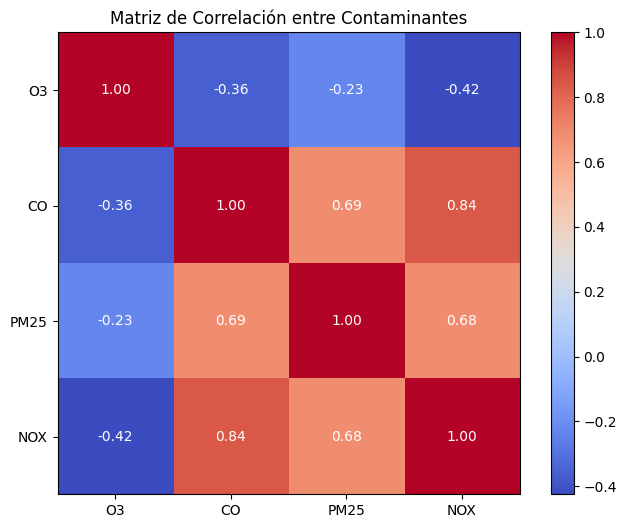

In [5]:
# Calculamos la matriz de correlacion con .corr()
matriz_correlacion = df_completo.corr()
columnas_corr = matriz_correlacion.columns

# Creamos la figura de la matriz
fig, ax = plt.subplots(figsize=(8, 6))
mapa_calor = ax.imshow(matriz_correlacion, cmap='coolwarm')
fig.colorbar(mapa_calor)
ax.set_xticks(np.arange(len(columnas_corr)))
ax.set_yticks(np.arange(len(columnas_corr)))
ax.set_xticklabels(columnas_corr)
ax.set_yticklabels(columnas_corr)

# Ponemos los numeros dentro de cada celda, con 2 "for . in range" para recorrer todas las filas y columnas
for i in range(len(columnas_corr)):
    for j in range(len(columnas_corr)):
        # Escribimos el texto, redondeado a 2 decimales usando .2f
        texto = ax.text(j, i, f"{matriz_correlacion.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")

ax.set_title('Matriz de Correlación entre Contaminantes')
plt.show()

El valor 1 indica que está perfectamente relacionado(solo es valor 1 cuando se comparan el mismo gas), y mientras va bajando el valor, significa que la relacion entre uno y otro es menor. por ejemplo, cuando es azul significa por ejemplo que cuando el O3 sube, el NOX tiende a bajar. y el rojo significa por ejemplo cuando el CO sube, el NOX tiende a subir tambien.

4.2 Pregunta 2: ¿Existen tendencias de mejora o deterioro en los niveles de material particulado fino (PM2,5) en los últimos años?

- Para poder observar tendencias a largo plazo y patrones estacionales, usaremos un grafico de linea usando el metodo .plot(). Los datos horarios los agruparemos por mes con el metodo .resample('M') y calcularemos el promedio para poder ver la tendencia general.

C:\Users\giosu\AppData\Local\Temp\ipykernel_18600\238457534.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pm25_mensual = df_completo['PM25'].resample('M').mean()


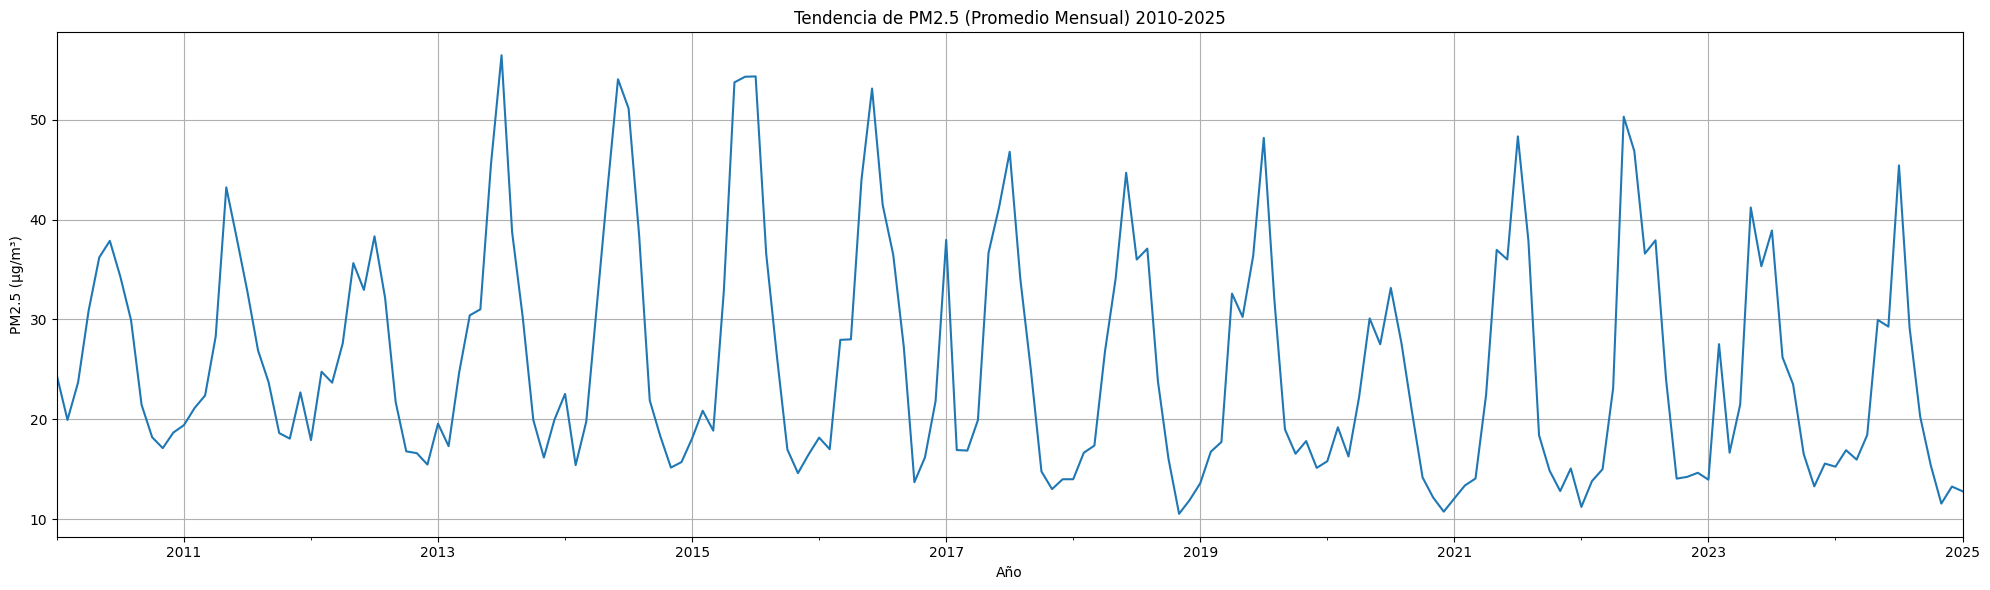

In [6]:

# Usamos .resample('M') que agrupa los datos por mes
# Usamos .mean() que calcula el promedio para cada mes
df_pm25_mensual = df_completo['PM25'].resample('M').mean()

# Creamos el grafico de linea
plt.figure(figsize=(20, 6))
df_pm25_mensual.plot()
plt.title('Tendencia de PM2.5 (Promedio Mensual) 2010-2025')
plt.xlabel('Año')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos apreciar que es en invierno de cada año(ya que se situa en la mitad entre 2 años) que se presenta un deterioro grande en la calidad del aire y se presenta una mejora en los veranos de cada año. Pero si comparamos el inicio(1 de enero de 2010) con el final(1 de enero de 2025), no se observa ningun deterioro, hasta podriamos decir que hay una leve mejora.

4.3 Pregunta 3: ¿Qué relación existe entre los niveles de ozono (O3) y los de óxidos de nitrógeno (NOX) en el sector?

- Para poder ver esta relación, usaremos un grafico de dispersion con el metodo plt.scatter(). Este grafico es la mejor opcion para comparar directamente dos variables numericas. Tomaremos una muestra aleatoria con el metodo .sample() con 5000 puntos.

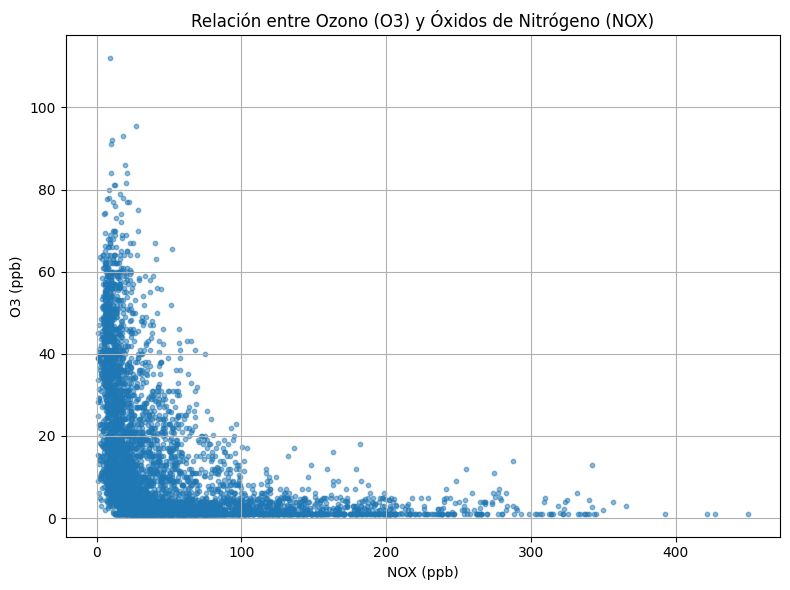

In [ ]:
# Seleccionamos las columnas O3 y NOX
df_o3_nox = df_completo[['O3', 'NOX']]

# Eliminamos las filas donde falte alguno de los dos valores
df_o3_nox_limpio = df_o3_nox.dropna()

# Tomamos una muestra aleatoria de 5000 puntos
df_muestra = df_o3_nox_limpio.sample(n=5000, random_state=1)

# Creamos el grafico
plt.figure(figsize=(8, 6))

# Usamos plt.scatter() para un grafico de dispersión
# Usamos tambien alpha que es para ver puntos superpuestos
plt.scatter(df_muestra['NOX'], df_muestra['O3'], alpha=0.5, s=10)
plt.title('Relación entre Ozono (O3) y Óxidos de Nitrógeno (NOX)')
plt.xlabel('NOX (ppb)')
plt.ylabel('O3 (ppb)')
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede apreciar que cuando los valores de NOX son bajos, los valores de O3 son altos. Pero cuando los valores de NOX son altos, los valores de O3 comienzan a disminuir.

Al investigar encontramos que el NO reacciona instantáneamente con el O3 y lo destruye en un proceso llamado "titulación".

NO + O3 --> NO2 + O2

entonces esta reaccion explica porque los niveles de O3 son bajos cuando los niveles de NOX son altos.

4.4 Pregunta 4: ¿Es posible construir un modelo de predicción de los niveles de PM2,5 a partir de variables como día de la semana, hora del día y concentración de otros contaminantes?

Usaremos 2 graficos distintos para 2 variables distintas:

- Para la variable "hora del dia" usaremos un grafico de linea con el metodo .plot(kind='line') para el promedio de PM2.5 en cada una de las 24 horas.
- Para la variable "dia de la semana" usaremos un grafico de barra con el metodo .plot(kind='bar') para el promedio de PM2.5 en cada dia de la semana.

Tambien usamos pd.Categorical para forzar el orden cronologico de los dias, ya que los dias en el grafico estaban saliendo desordenados.

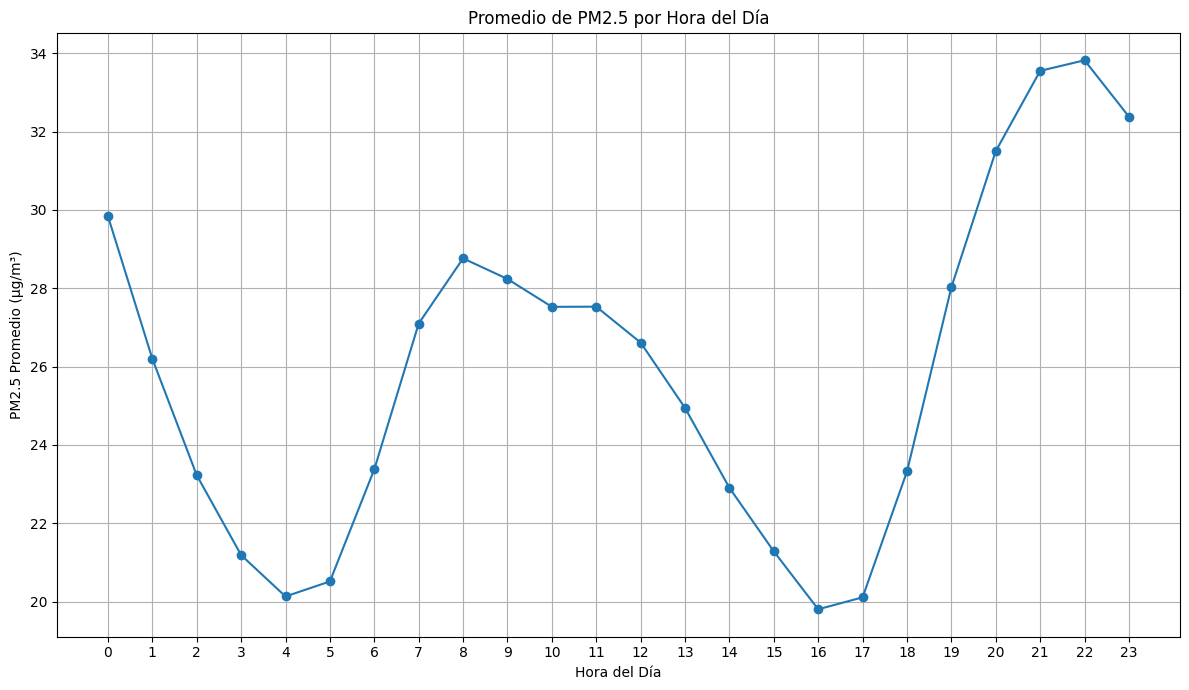

C:\Users\giosu\AppData\Local\Temp\ipykernel_18600\1686502036.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_promedio_dia = df_analisis_diario.groupby('dia_semana')['PM25'].mean()


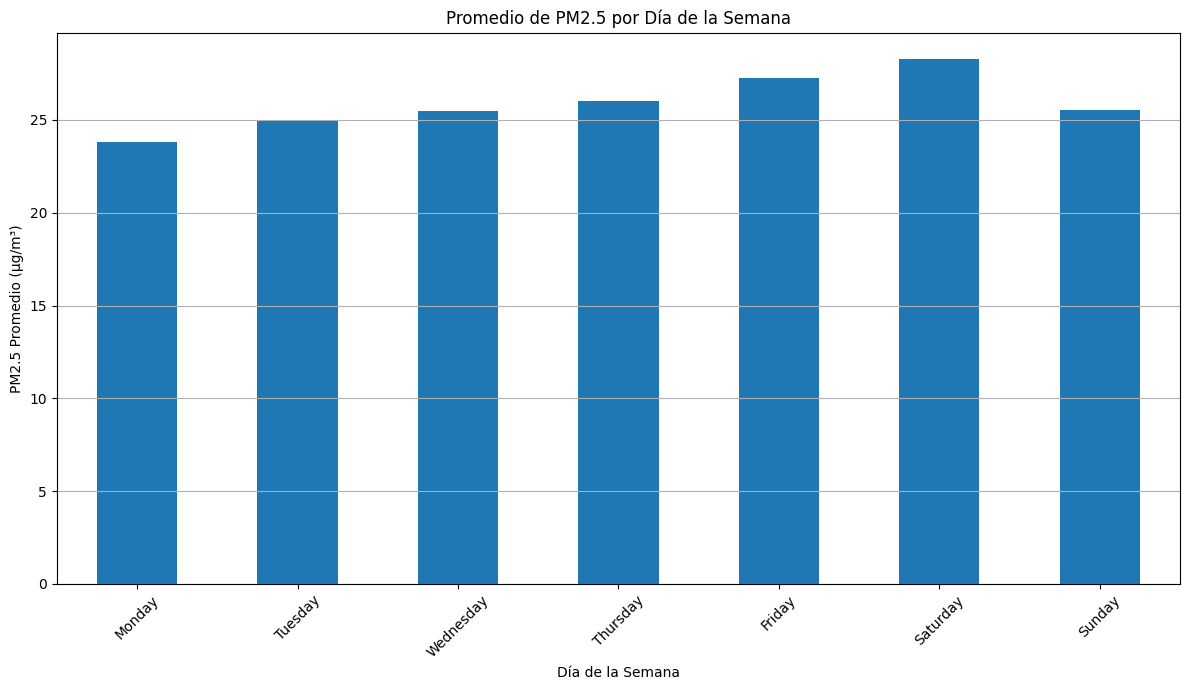

In [8]:
# Hacemos una copia del DataFrame para no modificar el original
df_analisis_diario = df_completo.copy()

# Creamos las nuevas columnas
df_analisis_diario['hora'] = df_analisis_diario.index.hour
df_analisis_diario['dia_semana'] = df_analisis_diario.index.day_name()

# Definimos el orden correcto de los dias de la semana(en ingles por que es el idioma por defecto)
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Convertimos la columna dia_semana a tipo Categorical para forzar el orden cronologico
df_analisis_diario['dia_semana'] = pd.Categorical(df_analisis_diario['dia_semana'], categories=orden_dias, ordered=True)

# Agrupamos (.groupby) por hora y calculamos el promedio (.mean) de PM2.5
df_promedio_hora = df_analisis_diario.groupby('hora')['PM25'].mean()

# Creamos el grafico por hora
plt.figure(figsize=(12, 7))
df_promedio_hora.plot(kind='line', marker='o')
plt.title('Promedio de PM2.5 por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('PM2.5 Promedio (µg/m³)')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()


# Agrupamos por dia_semana y calculamos el promedio de PM2.5
df_promedio_dia = df_analisis_diario.groupby('dia_semana')['PM25'].mean()

# Creamos el grafico por dia de la semana
plt.figure(figsize=(12, 7))
df_promedio_dia.plot(kind='bar')
plt.title('Promedio de PM2.5 por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('PM2.5 Promedio (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Aca ya podemos predecir la concentracion de contaminantes. Podemos ver como la contaminacion es mas alta en la noche, entre las 22 horas y las 0 horas y es mas baja en la tarde, entre las 16 y 17 horas. Y el patron semanal tambien es relevante, ya que nos muestra como se acumula la contaminacion de lunes a sabado, siendo el sabado el dia mas alto, y luego baja en el domingo. 

Estos 2 graficos nos demuestran que es posible que es posible crear un modelo de prediccion.

4.5 Pregunta 5: ¿Qué contaminantes presentan mayor riesgo sanitario según su frecuencia de superación de las normas de calidad ambiental en Chile?

Para responder esta pregunta necesitamos comparar la frecuencia de superación de norma de cada contaminante. Cada contaminante tiene una norma distinta:

- NOX(Norma de 1 hora): La norma es de 1 hora, ya que el gas es un irritante agudo, si respiras una concentración muy alta por solo 1 hora, te puede causar problemas respiratorios.

- O3 y CO(Norma de 8 horas): La norma es de 8 horas, ya que su peligro viene de una exposicion mas larga, la norma revisa si el promedio de cualquier bloque de 8 horas fue peligroso. Y para el codigo usamos ".rolling(window=8).mean()", que revisa el promedio por "ventanas" de 8 horas por ejemplo de 1 a 9, luego de 2 a 10, de 3 a 11, etc.

- PM2.5(Norma de 24 horas): El peligro con el PM2.5 es por la dosis total que respiraste en todo el dia, aunque tengas un peak de PM2.5 en la mañana, si el resto del dia fue limpio, el promedio del dia puede ser seguro. Y para el codigo usamos "resample.('D').mean()".

        Contaminante  Porcentaje de Superación
0              PM2.5                  8.500000
1         O3 (Ozono)                  0.478856
2      CO (Monóxido)                  0.000000
3  NOX (Óxidos Nit.)                  2.939282


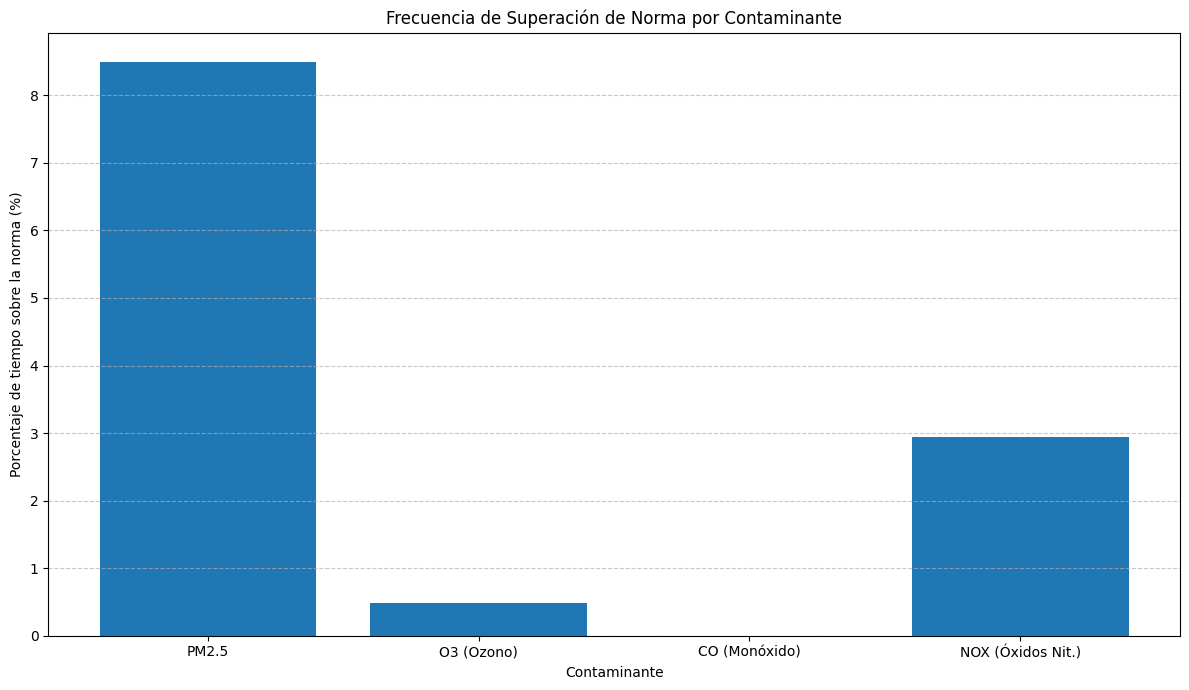

In [9]:
# Analisamos solo PM2.5

# Agrupamos los datos por dia y calculamos el promedio
df_pm25_diario = df_completo['PM25'].resample('D').mean()

# Definimos el valor de la norma diaria de PM2.5 (50)
norma_pm25_diaria = 50

# Calculamos cuántos días superaron la norma
# (df_pm25_diario > norma_pm25_diaria) crea una serie de True/False
# El metodo .sum() suma los "True" (porque True=1 y False=0)
dias_sobre_norma = (df_pm25_diario > norma_pm25_diaria).sum()
total_dias = df_pm25_diario.count() # .count() cuenta los días no-nulos
porcentaje_pm25 = (dias_sobre_norma / total_dias) * 100


# Analisis de O3
# Definimos la norma de O3 (61 ppb)
norma_o3_8h = 61

# El metodo .rolling(window=8) calcula el promedio de las ultimas 8 horas para cada hora
df_o3_movil = df_completo['O3'].rolling(window=8).mean()

# Calculamos cuantas horas superaron esta norma
horas_sobre_norma_o3 = (df_o3_movil > norma_o3_8h).sum()
total_horas_o3 = df_o3_movil.count()
porcentaje_o3 = (horas_sobre_norma_o3 / total_horas_o3) * 100


# Analisis de CO
# Definimos la norma de CO (10 ppm)
norma_co_8h = 10

# Hacemos lo mismo que con el O3
df_co_movil = df_completo['CO'].rolling(window=8).mean()

# Calculamos cuantas horas superaron la norma
horas_sobre_norma_co = (df_co_movil > norma_co_8h).sum()
total_horas_co = df_co_movil.count()
porcentaje_co = (horas_sobre_norma_co / total_horas_co) * 100


# Analisis de NOX
# La norma es para NO2, pero usaremos nuestros datos de NOX para una aproximacion
# Definimos la norma de 1 hora para NO2 (213 ppb)
norma_nox_1h = 213

# No necesitamos agrupar porque la norma es horaria y nuestros datos son horarios
df_nox_horario = df_completo['NOX'].dropna()

# Calculamos cuantas horas superaron la norma
horas_sobre_norma_nox = (df_nox_horario > norma_nox_1h).sum()
total_horas_nox = df_nox_horario.count()
porcentaje_nox = (horas_sobre_norma_nox / total_horas_nox) * 100


# Creamos un diccionario 
datos_riesgo = {
    'Contaminante': ['PM2.5', 'O3 (Ozono)', 'CO (Monóxido)', 'NOX (Óxidos Nit.)'],
    'Porcentaje de Superación': [porcentaje_pm25, porcentaje_o3, porcentaje_co, porcentaje_nox]
}

# Convertimos el diccionario a un DataFrame
df_riesgo = pd.DataFrame(datos_riesgo)

print(df_riesgo)

# Graficamos
plt.figure(figsize=(12, 7))
plt.bar(df_riesgo['Contaminante'], df_riesgo['Porcentaje de Superación'])
plt.title('Frecuencia de Superación de Norma por Contaminante')
plt.ylabel('Porcentaje de tiempo sobre la norma (%)')
plt.xlabel('Contaminante')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Como podemos ver, el PM2.5 superó su norma el 8.5% de los dias, mientras que el NOX un 2.9% de las horas, y el O3 solo el 0.5%. El CO nunca superó su norma.
Entonces podemos concluir con este grafico que el PM2.5 es el contaminante que presenta mayor riesgo sanitario en nuestra area de estudio.



#### 5. Preguntas de Investigación: 

¿Cómo se comparan los niveles de monóxido de carbono (CO) en el sector con los de otros contaminantes atmosféricos?

¿Existen tendencias de mejora o deterioro en los niveles de material particulado fino (PM2,5) en los últimos años?

¿Qué relación existe entre los niveles de ozono (O3) y los de óxidos de nitrógeno (NOX) en el sector?

¿Es posible construir un modelo de predicción de los niveles de PM2,5 a partir de variables como día de la semana, hora del día y concentración de otros contaminantes?

¿Qué contaminantes presentan mayor riesgo sanitario según su frecuencia de superación de las normas de calidad ambiental en Chile?


#### 6. Diseño tentativo: 

- Organización de los datos: revisión de las fuentes, carga de archivos y verificación de formatos.


- Limpieza de datos: manejo de valores nulos, duplicados y detección de posibles outliers.


- Análisis exploratorio: descripción estadística, correlaciones entre contaminantes y comparación temporal.


- Visualización: gráficos de tendencias, mapas de calor y representaciones comparativas usando herramientas como Pandas, Matplotlib y Plotly.


- Modelado predictivo: veremos el sistema a utilizar….


- Conclusiones: interpretación de resultados, vinculación con riesgos de salud y recomendaciones.


